# Recaman Sequence

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def recaman_sequence(N_steps=10):
    fig, ax = plt.subplots(figsize=(20, 10))
    sequence = []
    sequence.append(0)
    step = 1
    for i in range(N_steps):
        current = sequence[i]
        # Checl if you can go backwards
        prospect_back = current - step
        if prospect_back > 0:
            # Yes you can go back
            if prospect_back not in sequence:
                next_n = prospect_back
                sequence.append(prospect_back)
                step += 1
            # No you can't go back
            elif prospect_back in sequence:
                prospect_fwd = current + step
                if prospect_fwd not in sequence:
                    next_n = prospect_fwd
                    sequence.append(prospect_fwd)
                    step += 1
        else:
            prospect_fwd = current + step
            next_n = prospect_fwd
            sequence.append(prospect_fwd)
            step += 1
            
        # Plot some cool stuff
        center = np.mean([current, next_n])
        
        radius = (step - 1) / 2
        theta = np.linspace(0, np.pi, 100, endpoint=True)
        x, y = radius * np.cos(theta), (-1)**(i+1) * radius * np.sin(theta)
        ax.plot(center+x, y, color='black')
        ax.set_aspect('equal')
    return sequence
                    

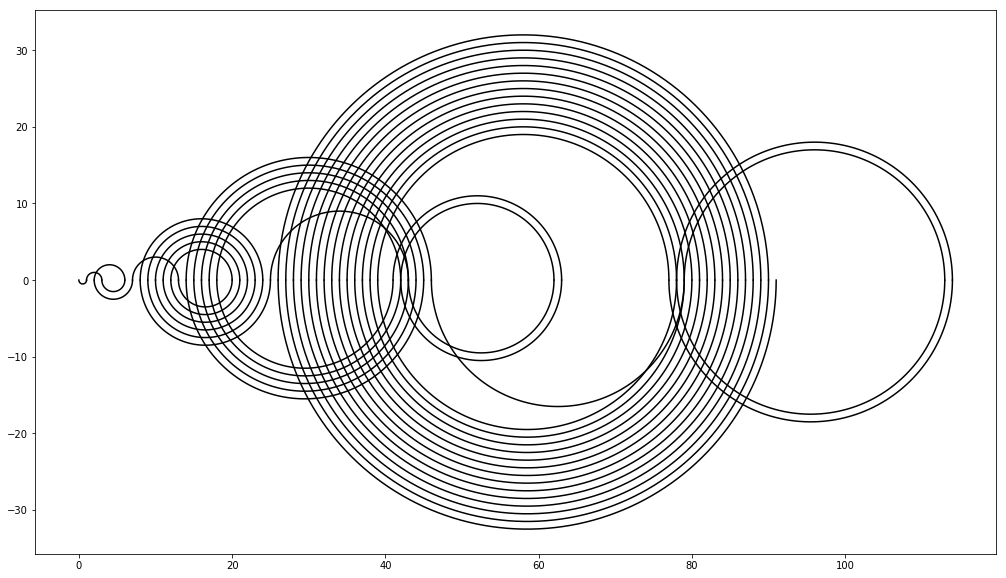

In [34]:
a = recaman_sequence(N_steps=65)
plt.show()